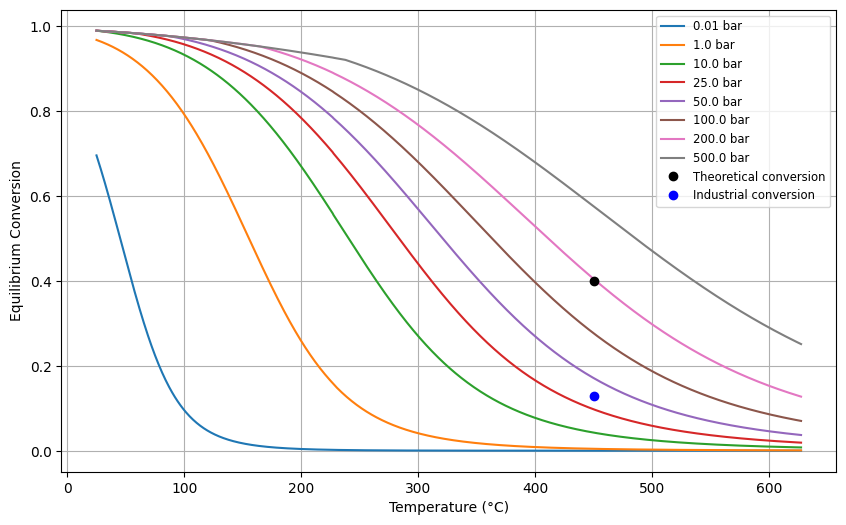

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import requests
from io import StringIO

# Download the file from GitHub
raw_url = "https://raw.githubusercontent.com/Aadam03/Thermodynamics/main/phase_change_ideal%20(3).py"
response = requests.get(raw_url)
response.raise_for_status()

# Create a file-like object from the string content
file_content = StringIO(response.text)

# Execute the file content to define the functions
exec(file_content.read())



In [2]:
#Constants
R = 8.314  # J/(mol·K)
T=298 #kelvin
NH3_T_Boil = 239.82 # K
L_NH3 = 23.37*1000
#P = np.linspace(1,400,100) *101325 #pascals
P = np.array([0.01,1,10,25,50,100,200,500])*101325
P=101325
T0=298
DHR_298 = -45.940*2 * 1000 #j/mol
DSR_298=-198.110 # j/(mol*K)
DGR_298  = DHR_298 - T0 * DSR_298 #j/mol

In [3]:
 def cubic_eqn(Z, A, B):
     return Z**3 -Z**2 +Z*(A - B - B**2) - A*B


In [4]:
def find_phi(Z,A,B):

 term1 = Z-1
 term2 = np.log(Z-B)
 term3 = A/B * np.log(Z/(Z+B))

 phi = np.exp(term1 - term2 +term3)

 return phi

In [5]:

def find_A_B(w,Tc,Pc,T,P,R):
 Tr = T/Tc
 alpha = (1 + (0.48508 + 1.55171 * w - 0.15613 * w**2) * (1 - (Tr)**0.5))**2
 oa = 1 / (9 * ((2**(1/3)) - 1))
 ob = (2**(1/3) - 1) / 3
 a = oa * R**2 * Tc**2 / Pc
 b = ob * R * Tc / Pc

# # Calculate A and B
 A = a*alpha*P/(R**2 * T**2.5)
 B = b*P/(R*T)
 return A,B

In [6]:
# import numpy as np

# def find_Z_and_Phi(P_values, A1_values, B1_values, phi_function):
#     # Initialize arrays to store Z and Phi values
#     Z_values = np.zeros_like(P_values, dtype=float)
#     Phi_values = np.zeros_like(P_values, dtype=float)

#     # Loop through each P value
#     for i, P in enumerate(P_values):
#         # Coefficients of the cubic equation for Z
#         coeffs = [1.0, -1.0, (A1_values[i] - B1_values[i] - B1_values[i]**2), -A1_values[i]*B1_values[i]]

#         # Find the roots of the cubic equation
#         roots = np.roots(coeffs)

#         # Choose the real root (assuming there is only one real root)
#         real_roots = roots[np.isreal(roots)].real

#         # Use the real root as Z
#         Z = real_roots[0]

#         # Calculate phi using the obtained Z
#         phi_value = phi_function(Z, A1_values[i], B1_values[i])

#         # Store Z and Phi values in arrays
#         Z_values[i] = Z
#         Phi_values[i] = phi_value

#     return Z_values, Phi_values


import numpy as np

def find_Z_and_Phi(P_values, A1_values, B1_values, phi_function):
    # Initialize arrays to store Z and Phi values
    #Z_values = np.zeros_like(P_values, dtype=float)
    #Phi_values = np.zeros_like(P_values, dtype=float)

    # Loop through each P value

        # Coefficients of the cubic equation for Z
        coeffs = [1.0, -1.0, (A1_values - B1_values - B1_values**2), -A1_values*B1_values]

        # Find the roots of the cubic equation
        roots = np.roots(coeffs)

        # Choose the real root (assuming there is only one real root)
        real_roots = roots[np.isreal(roots)].real

        # Use the real root as Z
        Z = real_roots[0]

        # Calculate phi using the obtained Z
        phi_value = phi_function(Z, A1_values, B1_values)
        return Z, phi_value


### Ammonia Data

In [7]:
w_NH3 = 0.253 # acentric factor for ammonia
Tc_NH3  = 405.56 #kelvin
Pc_NH3  = 11.357 *101325 #pa

### ` Nitrogen Data`

In [8]:
w_N2 = 0.04 # acentric factor for ammonia
Tc_N2  = 273+-147 #kelvin
Pc_N2  = 33 *101325 #pa


### Hydrogen Data

In [9]:
# data for Hydrogen
w_H2 = -0.22 # acentric factor
Tc_H2  = 33 #kelvin
Pc_H2  = 13.3 *101325 #pa


###  Getting SRK parameters

In [10]:

#Ammonia
A_NH3,B_NH3= find_A_B(w_NH3,Tc_NH3,Pc_NH3,T,P,R)

#Nitrogen
A_N2,B_N2= find_A_B(w_N2,Tc_N2,Pc_N2,T,P,R)

#Hydrogen
A_H2,B_H2= find_A_B(w_H2,Tc_H2,Pc_H2,T,P,R)


### Fugacity Coefficients

In [11]:
#Ammonia
Z_NH3, Phi_NH3 = find_Z_and_Phi(P, A_NH3, B_NH3, find_phi)

#Nitrogen
Z_N2, Phi_N2 = find_Z_and_Phi(P, A_N2, B_N2, find_phi)

#Hydrogen
Z_H2, Phi_H2 = find_Z_and_Phi(P, A_H2, B_H2, find_phi)

### `Getting Mol fractions

In [12]:
K_ideal_298 = Kp(DGR_298,T0)

Xe_ideal_298 = conversion(K_ideal_298,P) #multiple P constant T

#mol frac ammonia
y_NH3 = 2*Xe_ideal_298/(4-2*Xe_ideal_298)

#mol frac Nitrogen
y_N2 = (1 - Xe_ideal_298)/(4-2*Xe_ideal_298)

#mol frac Hydrogen
y_H2 = 3*(1 - Xe_ideal_298)/(4-2*Xe_ideal_298)

### Getting Fugacities

In [13]:
#Since f_i = Pi * Phi_i
# And since Pi = yi * P :

#Ammonia
f_NH3 = y_NH3.T * P * Phi_NH3

#Nitrogen

f_N2 = y_N2.T * P * Phi_N2

#Hydrogen

f_H2 = y_H2.T * P * Phi_H2

### Non Ideal Equilibrium Constant

In [14]:
def non_ideal_eqm_constant(f_NH3,f_N2,f_H2,n_NH3,n_N2,n_H2):
  K_non_ideal = (f_NH3)**n_NH3 / (((f_N2)**n_N2 )* ((f_H2)**n_H2))
  return K_non_ideal

In [15]:
n_NH3 = 2
n_N2 = 1
n_H2 =3
K_real_298 = non_ideal_eqm_constant(f_NH3,f_N2,f_H2,n_NH3,n_N2,n_H2)
K_real_298 = K_real_298.T

### Vant Hoff to get K_real at all desired T

In [16]:
T = np.linspace(T0, 900, 1000)  # Kelvin
Cp_data = cp_data()
Delta_CP_500, Delta_CP_2000 = DCp(Cp_data)
NH3_boil = clausius_clapeyron(NH3_T_Boil,R,L_NH3,101325,np.array([0.01,1,10,25,50,100,200,500])*101325)
enthalpy = np.zeros((len(T),len(NH3_boil)))
K_real = np.zeros_like(enthalpy)


for i in range(len(T)):
  for j in range(len(NH3_boil)):
    enthalpy[i,j] = DH(T0, T[i], DHR_298, Delta_CP_500, Delta_CP_2000,L_NH3,NH3_boil[j])
    # Calculate vant_hoff for the current K_ref value and temperature
    K_real[i,j] = vant_hoff(K_real_298, enthalpy[i,j], T[i])


### Find K_ideal

In [17]:
# Cp_data = heat_capacity_data()
# Delta_CP_500, Delta_CP_2000 = DCp(Cp_data)
# enthalpies = DH(T0, T, DHR_298, Delta_CP_500, Delta_CP_2000)
# entropies = DS(T0, T, DSR_298, Delta_CP_500, Delta_CP_2000)
# Gibbs_energies = DG(enthalpies, entropies, T)
# K_ideal = Kp(Gibbs_energies, T)

P = np.array([0.01,1,10,25,50,100,200,500])*101325

enthalpies = np.zeros_like(K_real)
entropies = np.zeros_like(K_real)
Gibbs_energies = np.zeros_like(K_real)
ideal_eqm_constant = np.zeros_like(K_real)
Xe_ideal = np.zeros_like(K_real)
for i in range(len(T)):
    for j in range(len(NH3_boil)):
        enthalpies[i, j] = DH(T0, T[i], DHR_298, Delta_CP_500, Delta_CP_2000, L_NH3, NH3_boil[j])
        entropies[i, j] = DS(T0, T[i], DSR_298, Delta_CP_500, Delta_CP_2000, L_NH3, NH3_boil[j],P[j])
        Gibbs_energies[i, j] = DG(enthalpies[i, j], entropies[i, j], T[i])
        ideal_eqm_constant[i, j] = Kp(Gibbs_energies[i, j], T[i])
        Xe_ideal[i,j] = conversion(ideal_eqm_constant[i,j], P[j])

In [18]:
x, P_real, K_f = sp.symbols('x P_real K_f')

den = 4 - 2*x
P_H2 = ((3*(1-x))/den) * P_real
P_N2 = (1-x)/den * P_real
P_NH3 = (2*x/den *P_real)
equation = P_NH3**2 / (P_N2 * P_H2**3)  - K_f
solution = sp.simplify(equation)
solution = sp.solve(equation,'x')[1]
solution


1 - 2*sqrt(3*sqrt(3)*sqrt(K_f)*P_real/(27*K_f*P_real**2 - 16) - 4/(27*K_f*P_real**2 - 16))

### Plotting conversions

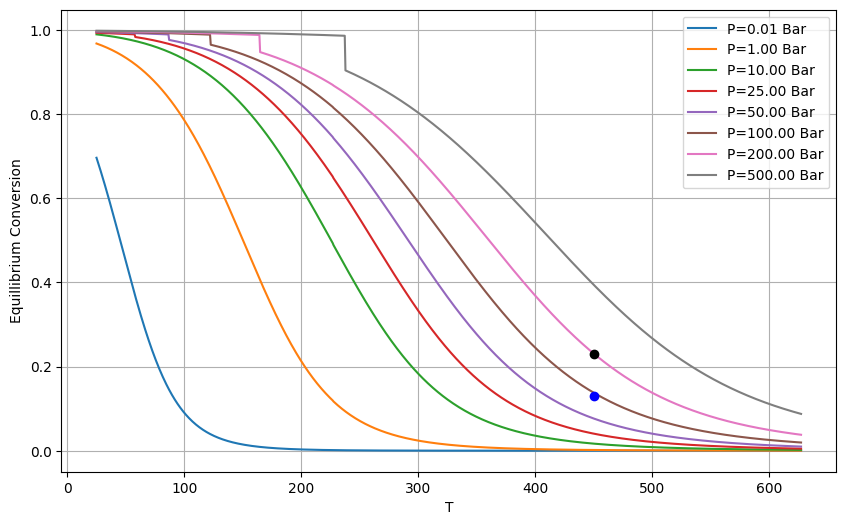

In [19]:
X_real = np.zeros((len(T),len(P)))
X_ideal = np.zeros((len(T),len(P)))

for i in range(len(T)):
  for j in range(len(P)):
    X_real[i,j]= conversion(K_real[i,j], P.T[j] / 101325)
    X_ideal[i,j] = conversion(ideal_eqm_constant[i,j], P.T[j] / 101325)



plt.figure(figsize=(10, 6))
for i in range(len(P)):
    plt.plot(T-273, X_real[:,i], label=f'P={P[i]/101325:.2f} Bar')

plt.legend()
plt.grid()
plt.plot(450, 0.23, 'ko', label='Theoretical conversion')  # Add label parameter here
plt.plot(450, 0.13, 'bo', label='Industrial conversion')
plt.xlabel('T')
plt.ylabel('Equillibrium Conversion')
plt.show()




### Plotting deviation

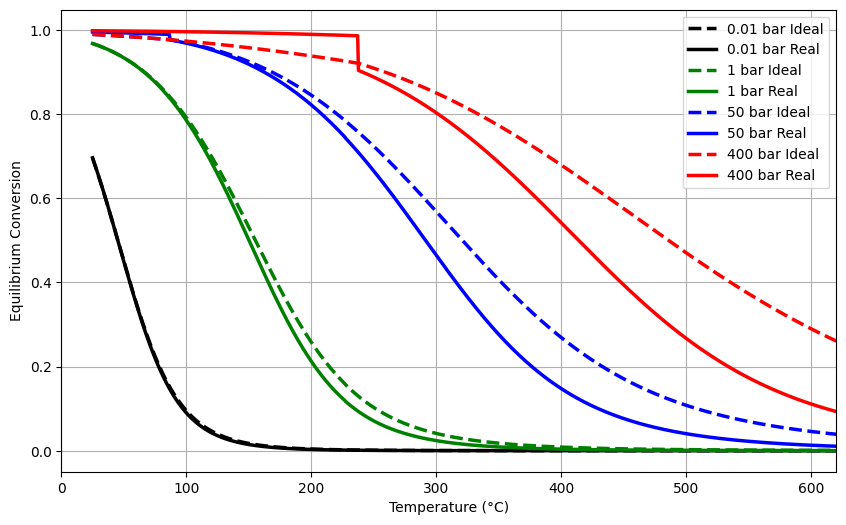

In [20]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([0.01, 1, 10, 25, 50, 100, 200, 400]) * 101325
plt.figure(figsize=(10,6))
plt.plot(T-273, X_ideal.T[0, :], 'k--', T-273, X_real.T[0, :], 'k-',linewidth = 2.5)
plt.plot(T-273, X_ideal.T[1, :], 'g--', T-273, X_real.T[1, :], 'g-',linewidth = 2.5)
plt.plot(T-273, X_ideal.T[4, :], 'b--', T-273, X_real.T[4, :], 'b-',linewidth = 2.5)
plt.plot(T-273, X_ideal.T[7, :], 'r--', T-273, X_real.T[7, :], 'r-',linewidth = 2.5)

# Use a list for legend labels
plt.legend(['0.01 bar Ideal', '0.01 bar Real','1 bar Ideal','1 bar Real', '50 bar Ideal', '50 bar Real', '400 bar Ideal', '400 bar Real'],fontsize = 10)

# Correct the function call for plt.grid
plt.grid()
plt.xlim(0,620)
# Correct the function call for ylabel and xlabel
plt.ylabel('Equilibrium Conversion')
#plt.title('Comparing Ideal and SRK models for Equilibrium Conversions of the Haber - Bosch Process')
plt.xlabel('Temperature (°C)')

# Show the plot
plt.show()
